In [ ]:
from transformers import pipeline
import pandas as pd
import numpy as np

In [ ]:
# Mount your google drive where you've saved your assignment folder
from google.colab import drive
drive.mount('/content/gdrive')

# Replace "exercise5" with the path to your directory such that it   is your working directory
%cd '/content/gdrive/MyDrive/SDU/DS821 - Market Sentiment Analysis/News_and_Market_Sentiment_Analytics-main/exam'

Mounted at /content/gdrive
/content/gdrive/MyDrive/SDU/DS821 - Market Sentiment Analysis/News_and_Market_Sentiment_Analytics-main/exam


In [ ]:
# Load
df = pd.read_csv('data/sentiment_done_3.csv')

In [ ]:
# Define emotion labels. Add the emotion columns to the dataframe.
candidate_labels = [
      "Excitement",
      "Joy",
      "Solidarity",
      "Fear",
      "Anxiety",
      "Regret",
      "Anger",
      "Frustration",
      "Rebellious"
  ]

for candidate_label in candidate_labels:
  df[candidate_label] = np.nan

In [ ]:
# Instantiate the pipeline. Device 0 is for GPU. distibert was used in class.
classifier = pipeline("zero-shot-classification",
                      model = "typeform/distilbert-base-uncased-mnli",
                      device=0
                      )


# Define the function for zero-shot-classification. Based on the code from Lecture 3.
def zsc(post):

  result = classifier(
    post,
    candidate_labels
  )
  classifications = dict(zip(result['labels'], result['scores']))
  return classifications



The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


In [ ]:
# Iterate through the rows, and store the emotions in each row.
# Skip already iterated rows.
# Save every 100 iterations.
for index, row in df.iterrows():
  if pd.isna(row['Joy']):
    print(f"Processing row {index}")
    classification = zsc(row['post'])
    for emotion, score in classification.items():
      df.at[index, emotion] = score

  if index % 100 == 0:
    df.to_csv('data/df_emotions.csv', index=False)
    print(f"Progress saved after {index+1} rows.")

In [ ]:
# Agregate the dataframe. Group it by sentiment. Get the means of each emotion.
agg_kv = {}
for label in candidate_labels:
  agg_kv[label] = 'mean'

emo = df.groupby('sentiment').agg(agg_kv)

In [ ]:
import matplotlib.pyplot as plt
emo

,Excitement,Joy,Solidarity,Fear,Anxiety,Regret,Anger,Frustration,Rebellious
sentiment,,,,,,,,,
bearish,0.104508,0.062424,0.084529,0.095640,0.100392,0.106499,0.104001,0.144327,0.197679
bullish,0.128168,0.083812,0.096613,0.101977,0.097400,0.096040,0.095398,0.123469,0.177125
neutral,0.118527,0.081770,0.101913,0.103512,0.102465,0.104338,0.099863,0.130289,0.157322


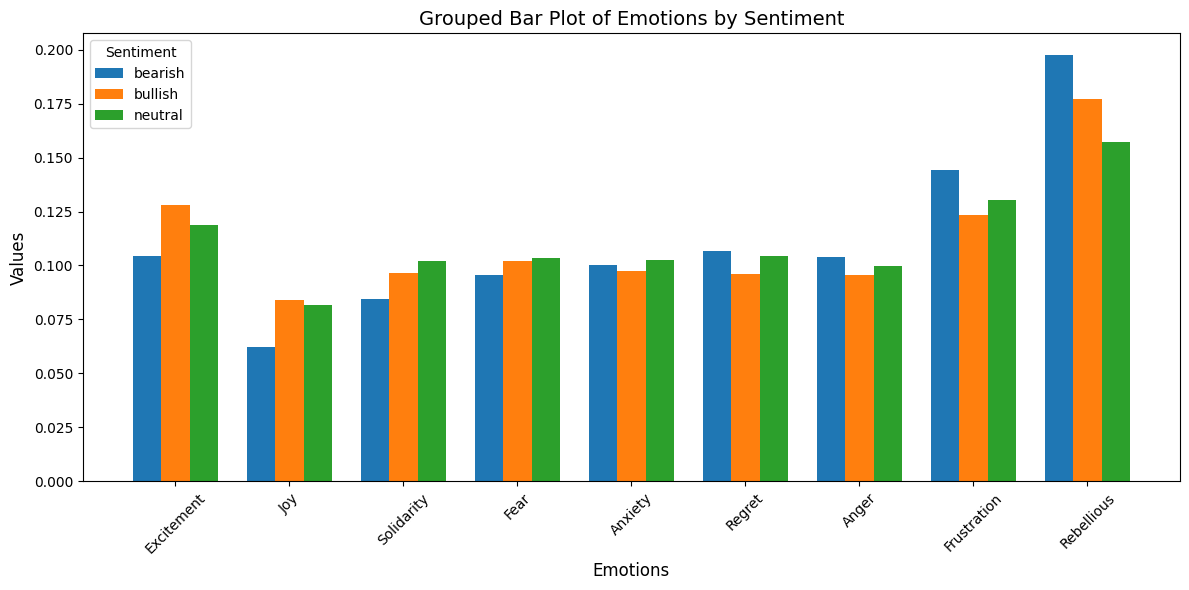

In [ ]:
# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))  # Set figure size
bar_width = 0.25  # Width of each bar
x = range(len(emo.columns))  # X positions for bars

# Plot each sentiment group
for i, sentiment in enumerate(emo.index):
    plt.bar([pos + i * bar_width for pos in x], emo.loc[sentiment],
            width=bar_width, label=sentiment)

# Add labels and formatting
plt.xlabel('Emotions', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Grouped Bar Plot of Emotions by Sentiment', fontsize=14)
plt.xticks([pos + bar_width for pos in x], emo.columns, rotation=45)  # Position xticks
plt.legend(title='Sentiment')  # Add legend
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()
